#EDA and Clustering project

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#let's try some SQL code to see how it works
!pip install pandasql
from pandasql import sqldf



In [ ]:
#import the dataset
path='//content/drive/MyDrive/DataSets'
df=pd.read_csv(path+'/uk_ecommerce.csv',sep=',',encoding='latin-1')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


In [ ]:
#let's see what the data looks like with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
#Let's add and additional column with the total revenue for purchase
df['Total_Revenue']=df['Quantity']*df['UnitPrice']

In [ ]:
#Let´s see the NaN or null values in the df and evaluate if they affect the EDA or the clustering
df.isna().sum()

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Unnamed: 8       541909
Total_Revenue         0
dtype: int64

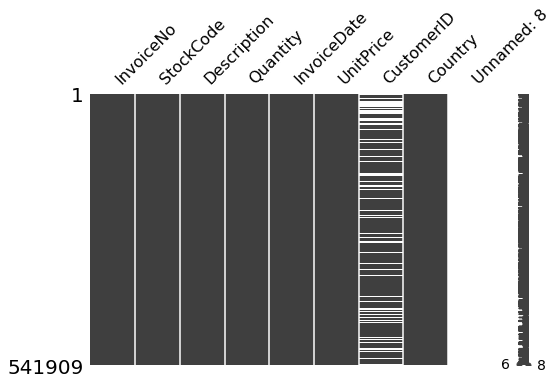

In [ ]:
msno.matrix(df,figsize=(8,5))

In [ ]:
#The column 'unnamed:8' is completely empty, and 135080 values in 'CustomeeID are missed.
#For EDA analysis we will keep the rows with no CustomerId and replace the NaN with 0, and drop 'unnamed:8'empty column
df_eda=df.drop(columns=['Unnamed: 8'])
df_eda=df_eda.fillna(0)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      541909 non-null  object 
 1   StockCode      541909 non-null  object 
 2   Description    541909 non-null  object 
 3   Quantity       541909 non-null  int64  
 4   InvoiceDate    541909 non-null  object 
 5   UnitPrice      541909 non-null  float64
 6   CustomerID     541909 non-null  float64
 7   Country        541909 non-null  object 
 8   Total_Revenue  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


#EDA
* What was the total revenue?
* In which months the sales were higher?
* What products are the top 10 in sales?
* Which products were returne more frequently?
* What is the lost revenue for returns?
* What is the top 3 countries that purchesed the most?
* What is the share of revenue for each cluster?

In [ ]:
#What was the total revenue?
Sum_revenue=df_eda.Total_Revenue.sum()
print ('Total Revenue:\n','$ ', round(Sum_revenue,2))

Total Revenue:
 $  9747747.93


In [ ]:
#In which months the sales were higher?

#let's separate the year and month
import datetime as dt
df_eda['InvoiceDate']=pd.to_datetime(df_eda['InvoiceDate'])

df_eda['Month']=df_eda['InvoiceDate'].dt.month
df_eda['Year']=df_eda['InvoiceDate'].dt.year

In [ ]:
#total amount per year
by_month=df_eda.groupby(df_eda['InvoiceDate'].dt.year).count().InvoiceDate
by_month

InvoiceDate
2016     42481
2017    499428
Name: InvoiceDate, dtype: int64

In [ ]:
Total_per_month=df_eda.groupby(['Year','Month'])['Total_Revenue'].sum()
Total_per_month

Year  Month
2016  11        104842.840
      12        644114.180
2017  1         609481.930
      2         492349.140
      3         663890.700
      4         475780.001
      5         769062.060
      6         651601.730
      7         704438.401
      8         725412.070
      9         952269.532
      10       1133061.700
      11       1496272.650
      12        325171.000
Name: Total_Revenue, dtype: float64

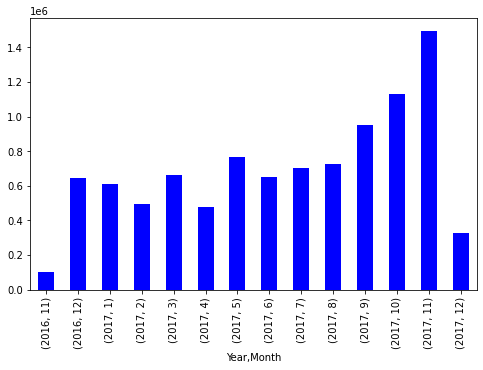

In [ ]:
Total_per_month.plot(kind='bar', color='blue',figsize=(8,5))

In [ ]:
#What products are the top 10 in sales?
Top_products=df_eda[['StockCode','Description','Quantity','Total_Revenue']].groupby(['StockCode','Description'],as_index=False).sum(['Quantity','Total_Revenue']).sort_values(by='Quantity',ascending=False)
Top_products.head(10)

,StockCode,Description,Quantity,Total_Revenue
4283,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
5068,85099B,JUMBO BAG RED RETROSPOT,47363,92356.03
4759,84879,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
1695,22197,POPCORN HOLDER,36334,33969.46
691,21212,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72
5100,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025,97715.99
2812,23084,RABBIT NIGHT LIGHT,30680,66756.59
2021,22492,MINI PAINT SET VINTAGE,26437,16810.42
2185,22616,PACK OF 12 LONDON TISSUES,26315,7972.76
1443,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24753,12189.47


In [ ]:
#Which products were returne more frequently?
#in progress

In [ ]:
#What is the lost revenue for returns?
#in progress

In [ ]:
#What is the top 3 countries that purchesed the most?
#in progress

In [ ]:
#What is the share of revenue for each cluster?
#in progress

#Clustering algorithm

For clustering, we need to identify the customers who make high purchases. 
* identify the number of customer segments
* Find the number of customers who are hightly valued

In [ ]:
#let's group the purchases by customer
df_sales=sqldf("SELECT CustomerID, COUNTRY, COUNT(InvoiceNo) AS Total_purchases, SUM(Total_Revenue) as Total_Revenue, SUM(Quantity) as Quantity FROM df GROUP BY CustomerID ORDER BY Quantity desc;")
df_sales.head()

,CustomerID,Country,Total_purchases,Total_Revenue,Quantity
0,NaN,United Kingdom,135080,1447682.12,269562
1,14646.0,Netherlands,2085,279489.02,196719
2,12415.0,Australia,778,123725.45,77242
3,14911.0,EIRE,5903,132572.62,77180
4,17450.0,United Kingdom,351,187482.17,69029


In [ ]:
#For clustering, we need to drop all the missing values from the df, 
#We need to find the significant customers for the business, so purchases with no CustomerID are useless
df_sales.dropna(inplace=True)

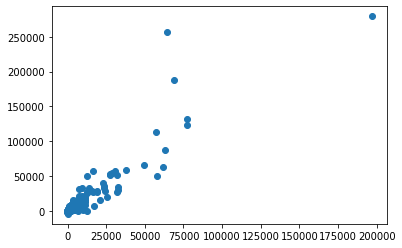

In [ ]:
#now, let's see how the data is distributed
plt.scatter(df_sales['Quantity'], df_sales['Total_Revenue'])

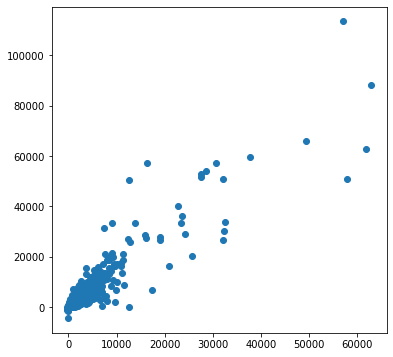

In [ ]:
#Here we can see outliers, to better intify the cluster centers, we need to set limits to the top values of Total_revenue and Quantity
df_clustering=sqldf("SELECT CustomerID,	Total_purchases,	Total_Revenue,	Quantity FROM df_sales WHERE Total_Revenue <150000 and Quantity <70000")
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(df_clustering['Quantity'], df_clustering['Total_Revenue'])

#Scaling using minmax scaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df_clustering[['Quantity']])
df_clustering['Quantity_scaled']=scaler.transform(df_clustering[['Quantity']])

scaler.fit(df_clustering[['Total_Revenue']])
df_clustering['Revenue_scaled']=scaler.transform(df_clustering[['Total_Revenue']])
df_clustering.head()

,CustomerID,Total_purchases,Total_Revenue,Quantity,Quantity_scaled,Revenue_scaled
0,17511.0,1076,88125.38,63012,1.000000,0.785346
1,13694.0,585,62653.10,61803,0.980905,0.568877
2,14298.0,1640,50862.44,58021,0.921172,0.468677
3,14156.0,1420,113384.14,57025,0.905441,1.000000
4,16684.0,281,65892.08,49390,0.784854,0.596402


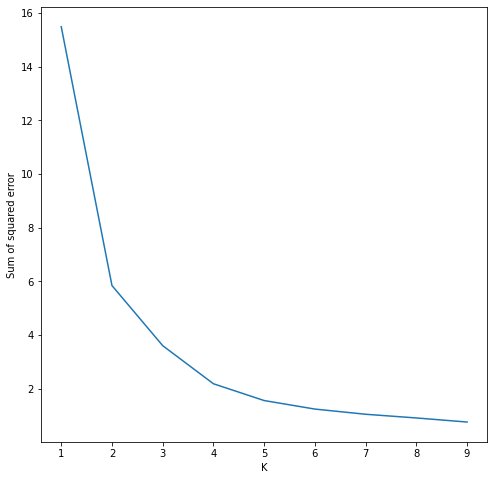

In [ ]:
#Now we need to find the k-clusters. Let's use the Elbow method to find them
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_clustering[['Quantity_scaled','Revenue_scaled']])
    sse.append(km.inertia_)

fig, axes = plt.subplots(1,1,figsize=(8,8))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

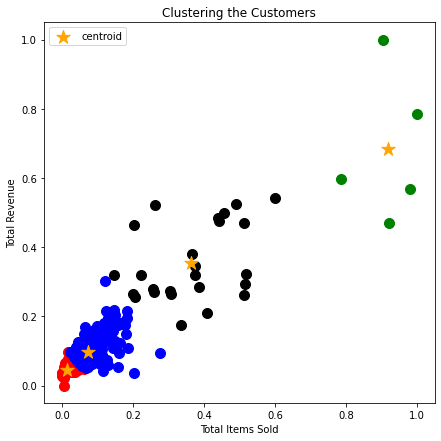

In [ ]:
#Let's trye Kmean method with the scaled data
km=KMeans(n_clusters=4)
points=df_clustering[['Quantity_scaled','Revenue_scaled']].to_numpy()
y_km=km.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='green')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid',s=200)
plt.xlabel('Total Items Sold')
plt.ylabel('Total Revenue')
plt.title('Clustering the Customers')

##other methos

No handles with labels found to put in legend.


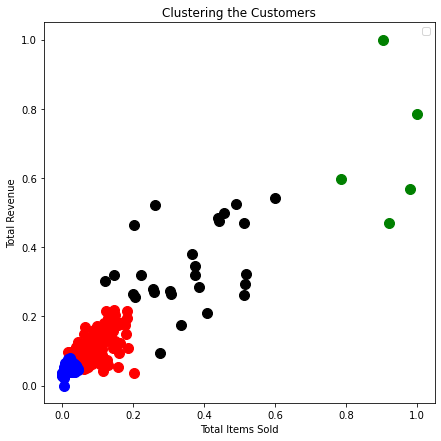

In [ ]:
#Agglomerative Cluster
agg = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_agg = agg.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
plt.scatter(points[y_agg ==0,0], points[y_agg == 0,1], s=100, c='red')
plt.scatter(points[y_agg ==1,0], points[y_agg == 1,1], s=100, c='black')
plt.scatter(points[y_agg ==2,0], points[y_agg == 2,1], s=100, c='blue')
plt.scatter(points[y_agg ==3,0], points[y_agg == 3,1], s=100, c='green')

plt.xlabel('Total Items Sold')
plt.ylabel('Total Revenue')
plt.title('Clustering the Customers')
plt.legend()


In [ ]:
df_clustering["cluster_agg"] = agg.labels_
df_clustering["cluster_km"] = km.labels_
df_clustering.head(10)

,CustomerID,Total_purchases,Total_Revenue,Quantity,Quantity_scaled,Revenue_scaled,cluster_agg,cluster_km
0,17511.0,1076,88125.38,63012,1.000000,0.785346,3,3
1,13694.0,585,62653.10,61803,0.980905,0.568877,3,3
2,14298.0,1640,50862.44,58021,0.921172,0.468677,3,3
3,14156.0,1420,113384.14,57025,0.905441,1.000000,3,3
4,16684.0,281,65892.08,49390,0.784854,0.596402,3,3
5,15311.0,2491,59419.34,37720,0.600537,0.541396,1,1
6,16422.0,399,33805.69,32592,0.519545,0.323725,1,1
7,17404.0,201,30300.82,32324,0.515312,0.293940,1,1
8,16333.0,45,26626.80,32184,0.513101,0.262717,1,1
9,16029.0,274,50992.61,32148,0.512533,0.469783,1,1


In [ ]:
#let's import a third method: DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.06,min_samples=4)
db.fit(points)
y_pred = db.fit_predict(points)
plt.scatter(points[:,0], points[:,1],c=y_pred)
plt.title("DBSCAN")



